In [2]:
#Muhamad Dimas Rizky Darmawan

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [4]:
base_dir = 'rockpaperscissors/rps-cv-images'

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

In [6]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Menambah dropout untuk mencegah overfitting
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer untuk 3 kelas (batu, kertas, gunting)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy'])

In [9]:
class StopTraining(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.98 and logs.get('val_accuracy') >= 0.98:
            print("Akurasi telah mencapai 98%, menghentikan pelatihan...")
            self.model.stop_training = True

In [10]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[StopTraining()]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 494ms/step - accuracy: 0.3858 - loss: 1.0898 - val_accuracy: 0.5069 - val_loss: 1.0169
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 407ms/step - accuracy: 0.5947 - loss: 0.9465 - val_accuracy: 0.7368 - val_loss: 0.7473
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 387ms/step - accuracy: 0.7447 - loss: 0.6941 - val_accuracy: 0.8330 - val_loss: 0.5141
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.7984 - loss: 0.5449 - val_accuracy: 0.8730 - val_loss: 0.3744
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.8720 - loss: 0.3753 - val_accuracy: 0.9039 - val_loss: 0.2967
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.8969 - loss: 0.3309 - val_accuracy: 0.9073 - val_loss: 0.2810
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 415ms/step - accuracy: 0.8982 - loss: 0.2969 - val_accuracy: 0.9222 - val_loss: 0.2534
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 455ms/step - accuracy: 0.9173 - loss: 0.2509 - val_accuracy: 0.916

In [11]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Akurasi pada data validasi: {accuracy*100:.2f}%")


28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - accuracy: 0.9825 - loss: 0.0596
Akurasi pada data validasi: 97.94%


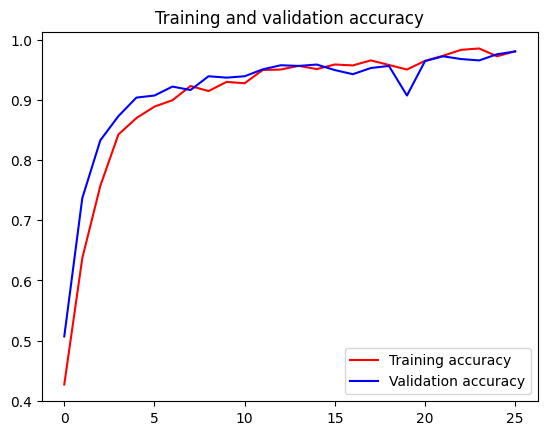

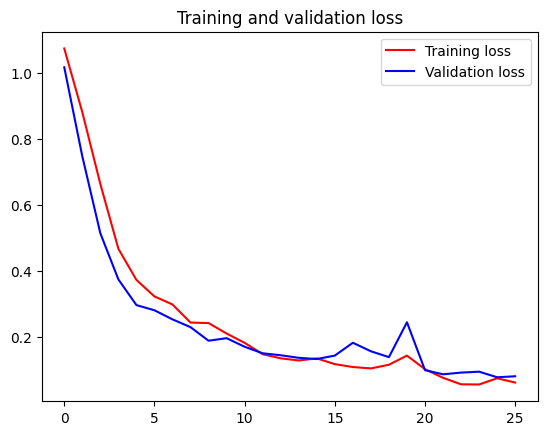

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Saving 9OyGmAsWD5Ie6QIa.png to 9OyGmAsWD5Ie6QIa.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


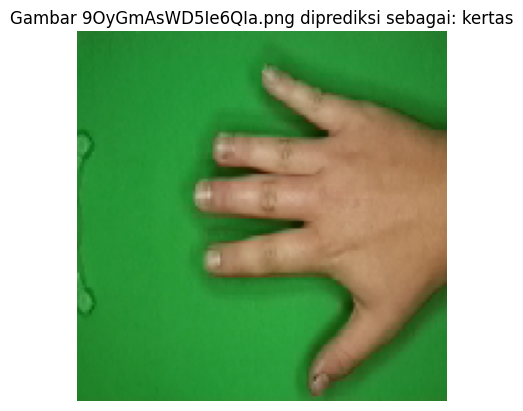

In [22]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    class_names = ['kertas', 'batu', 'gunting']
    predicted_class = class_names[np.argmax(prediction[0])]

    plt.imshow(img)
    plt.title(f"Gambar {fn} diprediksi sebagai: {predicted_class}")
    plt.axis('off')
    plt.show()